In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns

In [2]:
df = pd.read_csv("train_data_ads.csv")

In [76]:
small_df = df.sample(frac = 0.01)
small_df.to_csv('smallads.csv', index=False)


In [45]:
print(df.describe)

<bound method NDFrame.describe of          log_id  label  user_id  age  gender  residence  city  city_rank  \
0        373250      0   100005    3       2         16   147          2   
1        373253      1   100005    3       2         16   147          2   
2        373252      1   100005    3       2         16   147          2   
3        373251      0   100005    3       2         16   147          2   
4        373255      0   100005    3       2         16   147          2   
...         ...    ...      ...  ...     ...        ...   ...        ...   
7675512  650508      0   287180    6       4         33   319          3   
7675513  650492      0   287180    6       4         33   319          3   
7675514  650509      0   287180    6       4         33   319          3   
7675515  650491      1   287180    6       4         33   319          3   
7675516  650499      0   287180    6       4         33   319          3   

         series_dev  series_group  ...             ad

In [3]:
print(df.dtypes)

log_id                    int64
label                     int64
user_id                   int64
age                       int64
gender                    int64
residence                 int64
city                      int64
city_rank                 int64
series_dev                int64
series_group              int64
emui_dev                  int64
device_name               int64
device_size               int64
net_type                  int64
task_id                   int64
adv_id                    int64
creat_type_cd             int64
adv_prim_id               int64
inter_type_cd             int64
slot_id                   int64
site_id                   int64
spread_app_id             int64
hispace_app_tags          int64
app_second_class          int64
app_score               float64
ad_click_list_v001       object
ad_click_list_v002       object
ad_click_list_v003       object
ad_close_list_v001       object
ad_close_list_v002       object
ad_close_list_v003       object
pt_d    

In [4]:
print(df.shape)

(7675517, 35)


In [5]:
print(df.nunique().sort_values())

site_id                       1
label                         2
app_score                     3
gender                        3
inter_type_cd                 4
city_rank                     4
net_type                      6
series_group                  7
u_feedLifeCycle               8
age                           8
creat_type_cd                 9
u_refreshTimes               10
app_second_class             20
series_dev                   27
emui_dev                     27
residence                    35
hispace_app_tags             43
slot_id                      60
spread_app_id               116
device_name                 256
city                        341
adv_prim_id                 545
device_size                1547
ad_close_list_v003         1715
ad_close_list_v002         2701
ad_close_list_v001         3883
pt_d                       5436
task_id                   11209
adv_id                    12615
ad_click_list_v003        61102
user_id                   65297
ad_click

In [71]:
def classify_variable(series):
    if series.dtype in ['int64', 'float64']:
        unique_values = series.nunique()
        if unique_values < 1500: 
            return 'Discrete'
        else:
            return 'Continuous'
    else:
        return 'Discrete'


In [72]:
variable_classification = pd.DataFrame({
    'Variable': df.columns,
    'Type': df.apply(classify_variable)
})

print(variable_classification)


                                  Variable        Type
log_id                              log_id  Continuous
label                                label    Discrete
user_id                            user_id  Continuous
age                                    age    Discrete
gender                              gender    Discrete
residence                        residence    Discrete
city                                  city    Discrete
city_rank                        city_rank    Discrete
series_dev                      series_dev    Discrete
series_group                  series_group    Discrete
emui_dev                          emui_dev    Discrete
device_name                    device_name    Discrete
device_size                    device_size  Continuous
net_type                          net_type    Discrete
task_id                            task_id  Continuous
adv_id                              adv_id  Continuous
creat_type_cd                creat_type_cd    Discrete
adv_prim_i

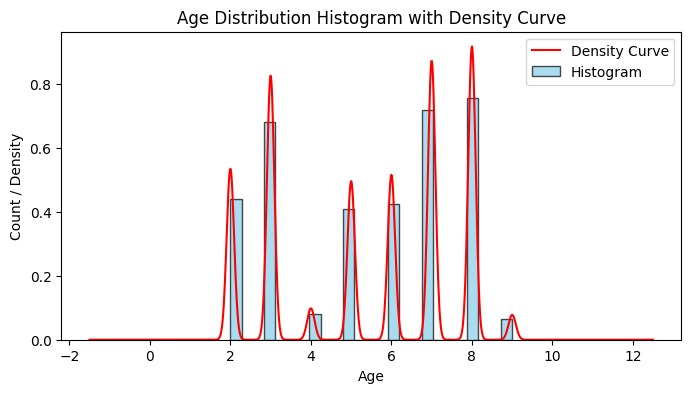

In [73]:

plt.figure(figsize=(8, 4))
plt.hist(df['age'],edgecolor = 'black',alpha=0.7,bins=25,color = 'skyblue',density=True)
df['age'].plot(kind='kde', color = 'red')
plt.xlabel('Age')
plt.ylabel('Count / Density')
plt.title('Age Distribution Histogram with Density Curve')
plt.legend(['Density Curve', 'Histogram'])
plt.show()


In [77]:
object_columns = df.select_dtypes(include=['object']).columns
df_without_objects = df.drop(columns=object_columns)

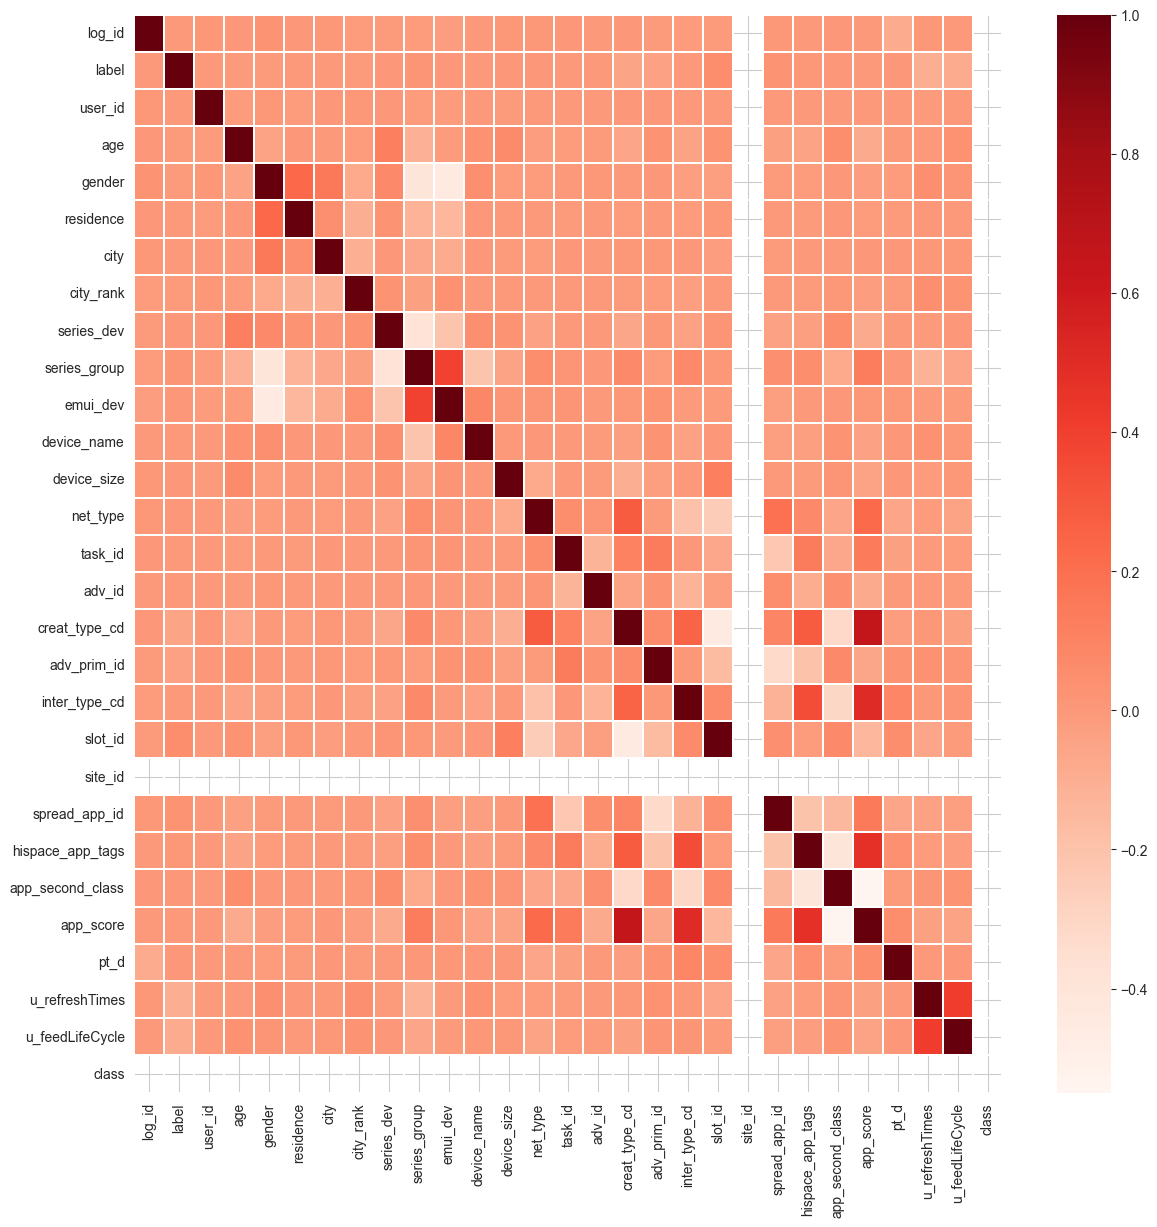

In [95]:
plt.figure(figsize = (14,14))
plt.title('')
corr = df_without_objects.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [3]:
#Solution 2.1
task_counts = df['task_id'].value_counts()

# Solution 2.2

## Calculate mean
mean_value = task_counts.mean()

## Calculate standard deviation
std_deviation = task_counts.std()

# Solution 2.3

## Calculate quartiles (Q1, Q2, Q3)
q1 = task_counts.quantile(0.25)
q2 = task_counts.median()
q3 = task_counts.quantile(0.75)

## Calculate maximum and minimum values
max_value = task_counts.max()
min_value = task_counts.min()

# Solution 2.4 
## Print results
print(f'Mean: {mean_value}')
print(f'Standard Deviation: {std_deviation}')
print(f'Q1 (25th percentile): {q1}')
print(f'Q2 (Median, 50th percentile): {q2}')
print(f'Q3 (75th percentile): {q3}')
print(f'Maximum Value: {max_value}')
print(f'Minimum Value: {min_value}')

Mean: 684.7637612632706
Standard Deviation: 3733.6798077622416
Q1 (25th percentile): 8.0
Q2 (Median, 50th percentile): 50.0
Q3 (75th percentile): 272.0
Maximum Value: 154812
Minimum Value: 1


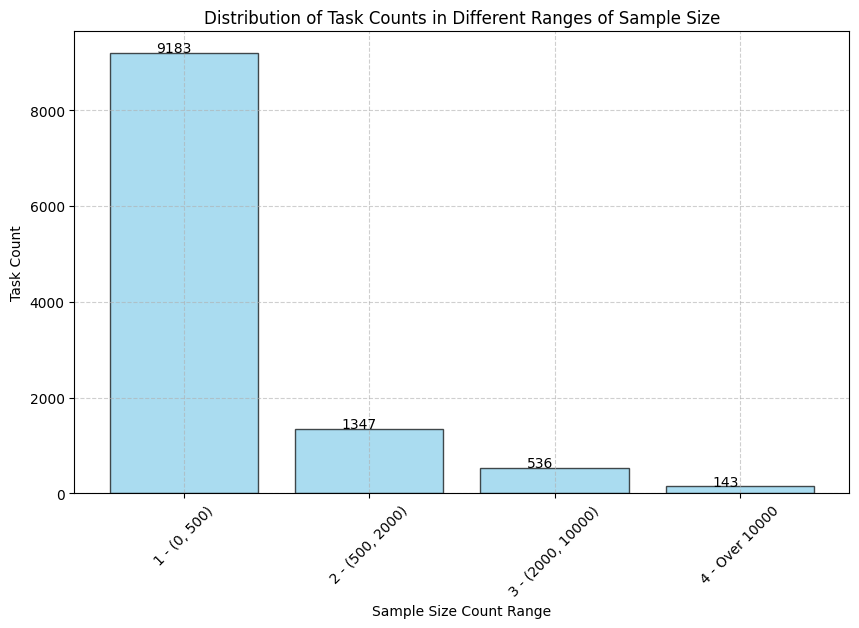

In [4]:
# Solution 3.1 
## Assuming your DataFrame is named df
task_counts = df['task_id'].value_counts()

# Solution 3.2

## Define bin edges
bins = [0, 500, 2000, 10000, float('inf')]

# Solution 3.3

## Bucket task_counts using pd.cut
task_groups = pd.cut(task_counts, bins=bins)

# Solution 3.4

## Count the number of occurrences for each group
task_counts_by_group = task_groups.value_counts().sort_index()

# Solution 3.5

## Extract labels for the groups
group_labels = ['1 - (0, 500)', '2 - (500, 2000)', '3 - (2000, 10000)', '4 - Over 10000']

# Solution 3.6

## Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(group_labels, task_counts_by_group, color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Sample Size Count Range')
plt.ylabel('Task Count')
plt.title('Distribution of Task Counts in Different Ranges of Sample Size')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

## Add text labels above each bar
for bar, count in zip(bars, task_counts_by_group):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 20, str(count), fontsize=10)

plt.show()

In [5]:
new_df = df[df['task_id'].isin(task_counts[task_counts>=10000].index)]

In [96]:
object_columns = df.select_dtypes(include=['object']).columns
df_without_objects = df.drop(columns=object_columns)

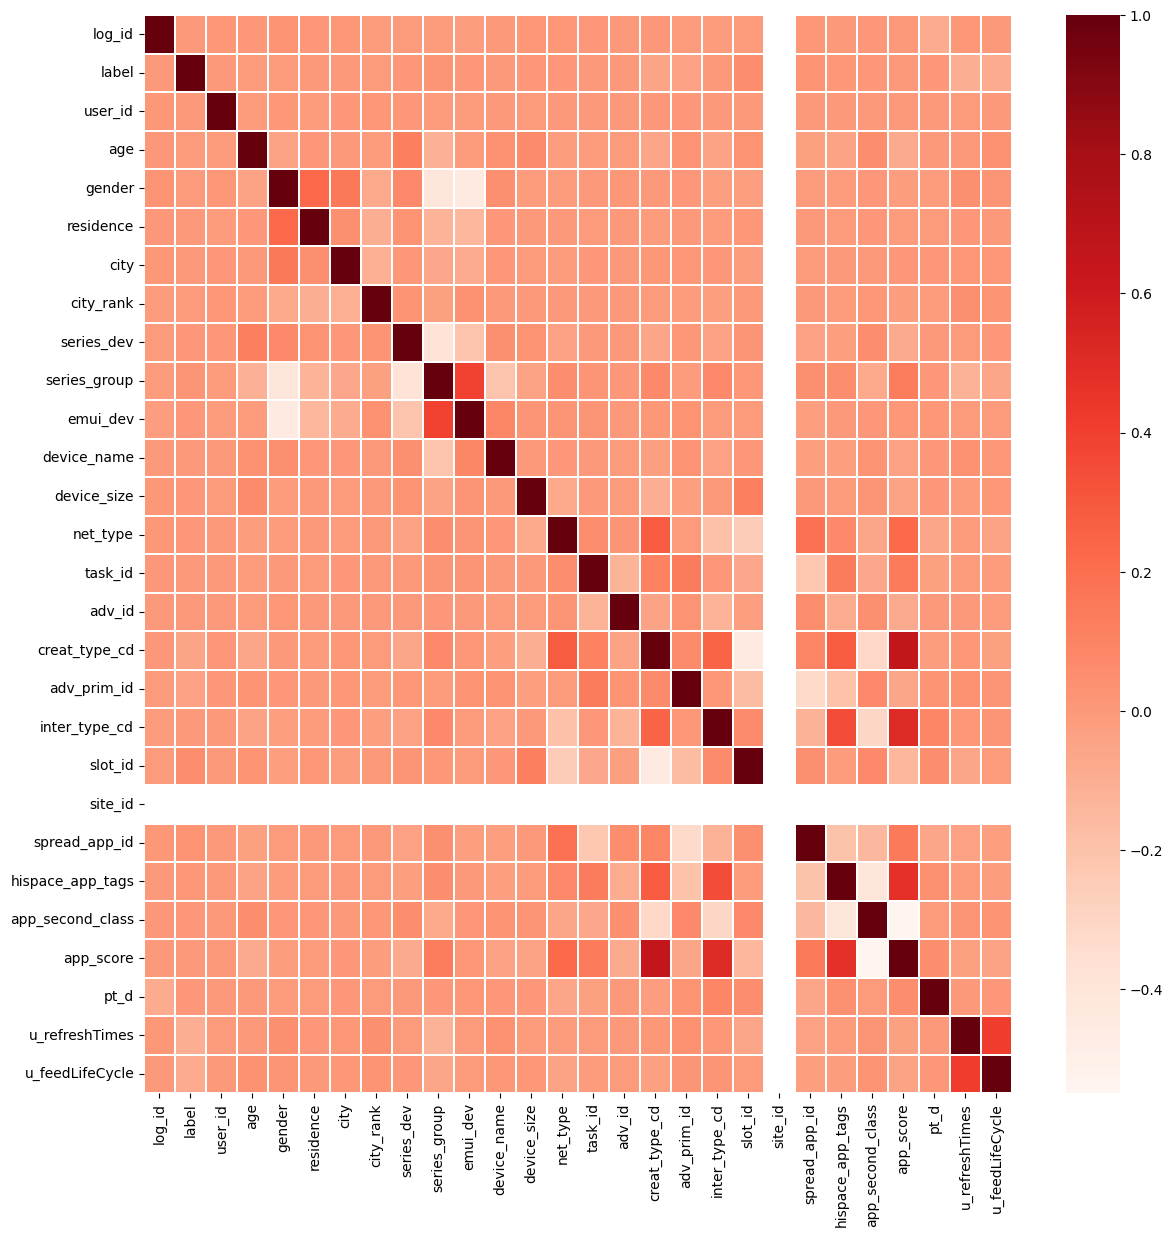

In [81]:
plt.figure(figsize = (14,14))
plt.title('')
corr = df_without_objects.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 定義函數來計算VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

def variance_inflation_factor(X, var_idx):
    """
    計算特定變量的VIF
    :param X: 自變量矩陣
    :param var_idx: 欲計算VIF的變量索引
    :return: VIF值
    """
    y = X[:, var_idx]
    X = np.delete(X, var_idx, axis=1)
    model = LinearRegression().fit(X, y)
    r_squared = model.score(X, y)
    return 1 / (1 - r_squared)


X = df.select_dtypes(include=[np.number])  # 假設所有數值型變量都是自變量

# 標準化變量
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 計算VIF
vif_data = calculate_vif(pd.DataFrame(X_scaled, columns=X.columns))

# 遞迴地移除高VIF變量，重新計算VIF，直到所有VIF值低於一個合理的閾值
max_vif_threshold = 10  # 可以根據需要調整
iteration = 0
max_iterations = 10  # 最大迭代次數，防止無限循環

while vif_data['VIF'].max() > max_vif_threshold and iteration < max_iterations:
    iteration += 1
    max_vif_variable = vif_data.sort_values('VIF', ascending=False).iloc[0]['Variable']
    print(f"Removing variable '{max_vif_variable}' with VIF={vif_data['VIF'].max()}")
    X = X.drop(columns=[max_vif_variable])
    X_scaled = scaler.fit_transform(X)
    vif_data = calculate_vif(pd.DataFrame(X_scaled, columns=X.columns))

print("\nFinal VIF values after removing high VIF variables:")
print(vif_data)


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_30547/82411566.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (1 - r_squared)


Removing variable 'site_id' with VIF=inf

Final VIF values after removing high VIF variables:
            Variable       VIF
0             log_id  1.008410
1              label  1.013720
2            user_id  1.000799
3                age  1.032794
4             gender  1.461950
5          residence  1.066593
6               city  1.038392
7          city_rank  1.035224
8         series_dev  1.206475
9       series_group  1.603561
10          emui_dev  1.409161
11       device_name  1.076843
12       device_size  1.025840
13          net_type  1.177129
14           task_id  1.031864
15            adv_id  1.008016
16     creat_type_cd  1.470444
17       adv_prim_id  1.090744
18     inter_type_cd  1.481585
19           slot_id  1.184590
20     spread_app_id  1.253166
21  hispace_app_tags  1.499984
22  app_second_class  1.577433
23         app_score  2.040148
24              pt_d  1.020765
25    u_refreshTimes  1.230360
26   u_feedLifeCycle  1.209431


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

def variance_inflation_factor(X, var_idx):
    
    y = X[:, var_idx]
    X = np.delete(X, var_idx, axis=1)
    model = LinearRegression().fit(X, y)
    r_squared = model.score(X, y)
    return 1 / (1 - r_squared)


X = df.select_dtypes(include=[np.number])  

# 標準化變量
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 計算VIF
vif_data = calculate_vif(pd.DataFrame(X_scaled, columns=X.columns))

print(vif_data)


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_30547/1423964890.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (1 - r_squared)


            Variable       VIF
0             log_id  1.008410
1              label  1.013720
2            user_id  1.000799
3                age  1.032794
4             gender  1.461950
5          residence  1.066593
6               city  1.038392
7          city_rank  1.035224
8         series_dev  1.206475
9       series_group  1.603561
10          emui_dev  1.409161
11       device_name  1.076843
12       device_size  1.025840
13          net_type  1.177129
14           task_id  1.031864
15            adv_id  1.008016
16     creat_type_cd  1.470444
17       adv_prim_id  1.090744
18     inter_type_cd  1.481585
19           slot_id  1.184590
20           site_id       inf
21     spread_app_id  1.253166
22  hispace_app_tags  1.499984
23  app_second_class  1.577433
24         app_score  2.040148
25              pt_d  1.020765
26    u_refreshTimes  1.230360
27   u_feedLifeCycle  1.209431


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/3641621472.py:27: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/3641621472.py:27: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/3641621472.py:27: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipyker

<Figure size 640x480 with 0 Axes>

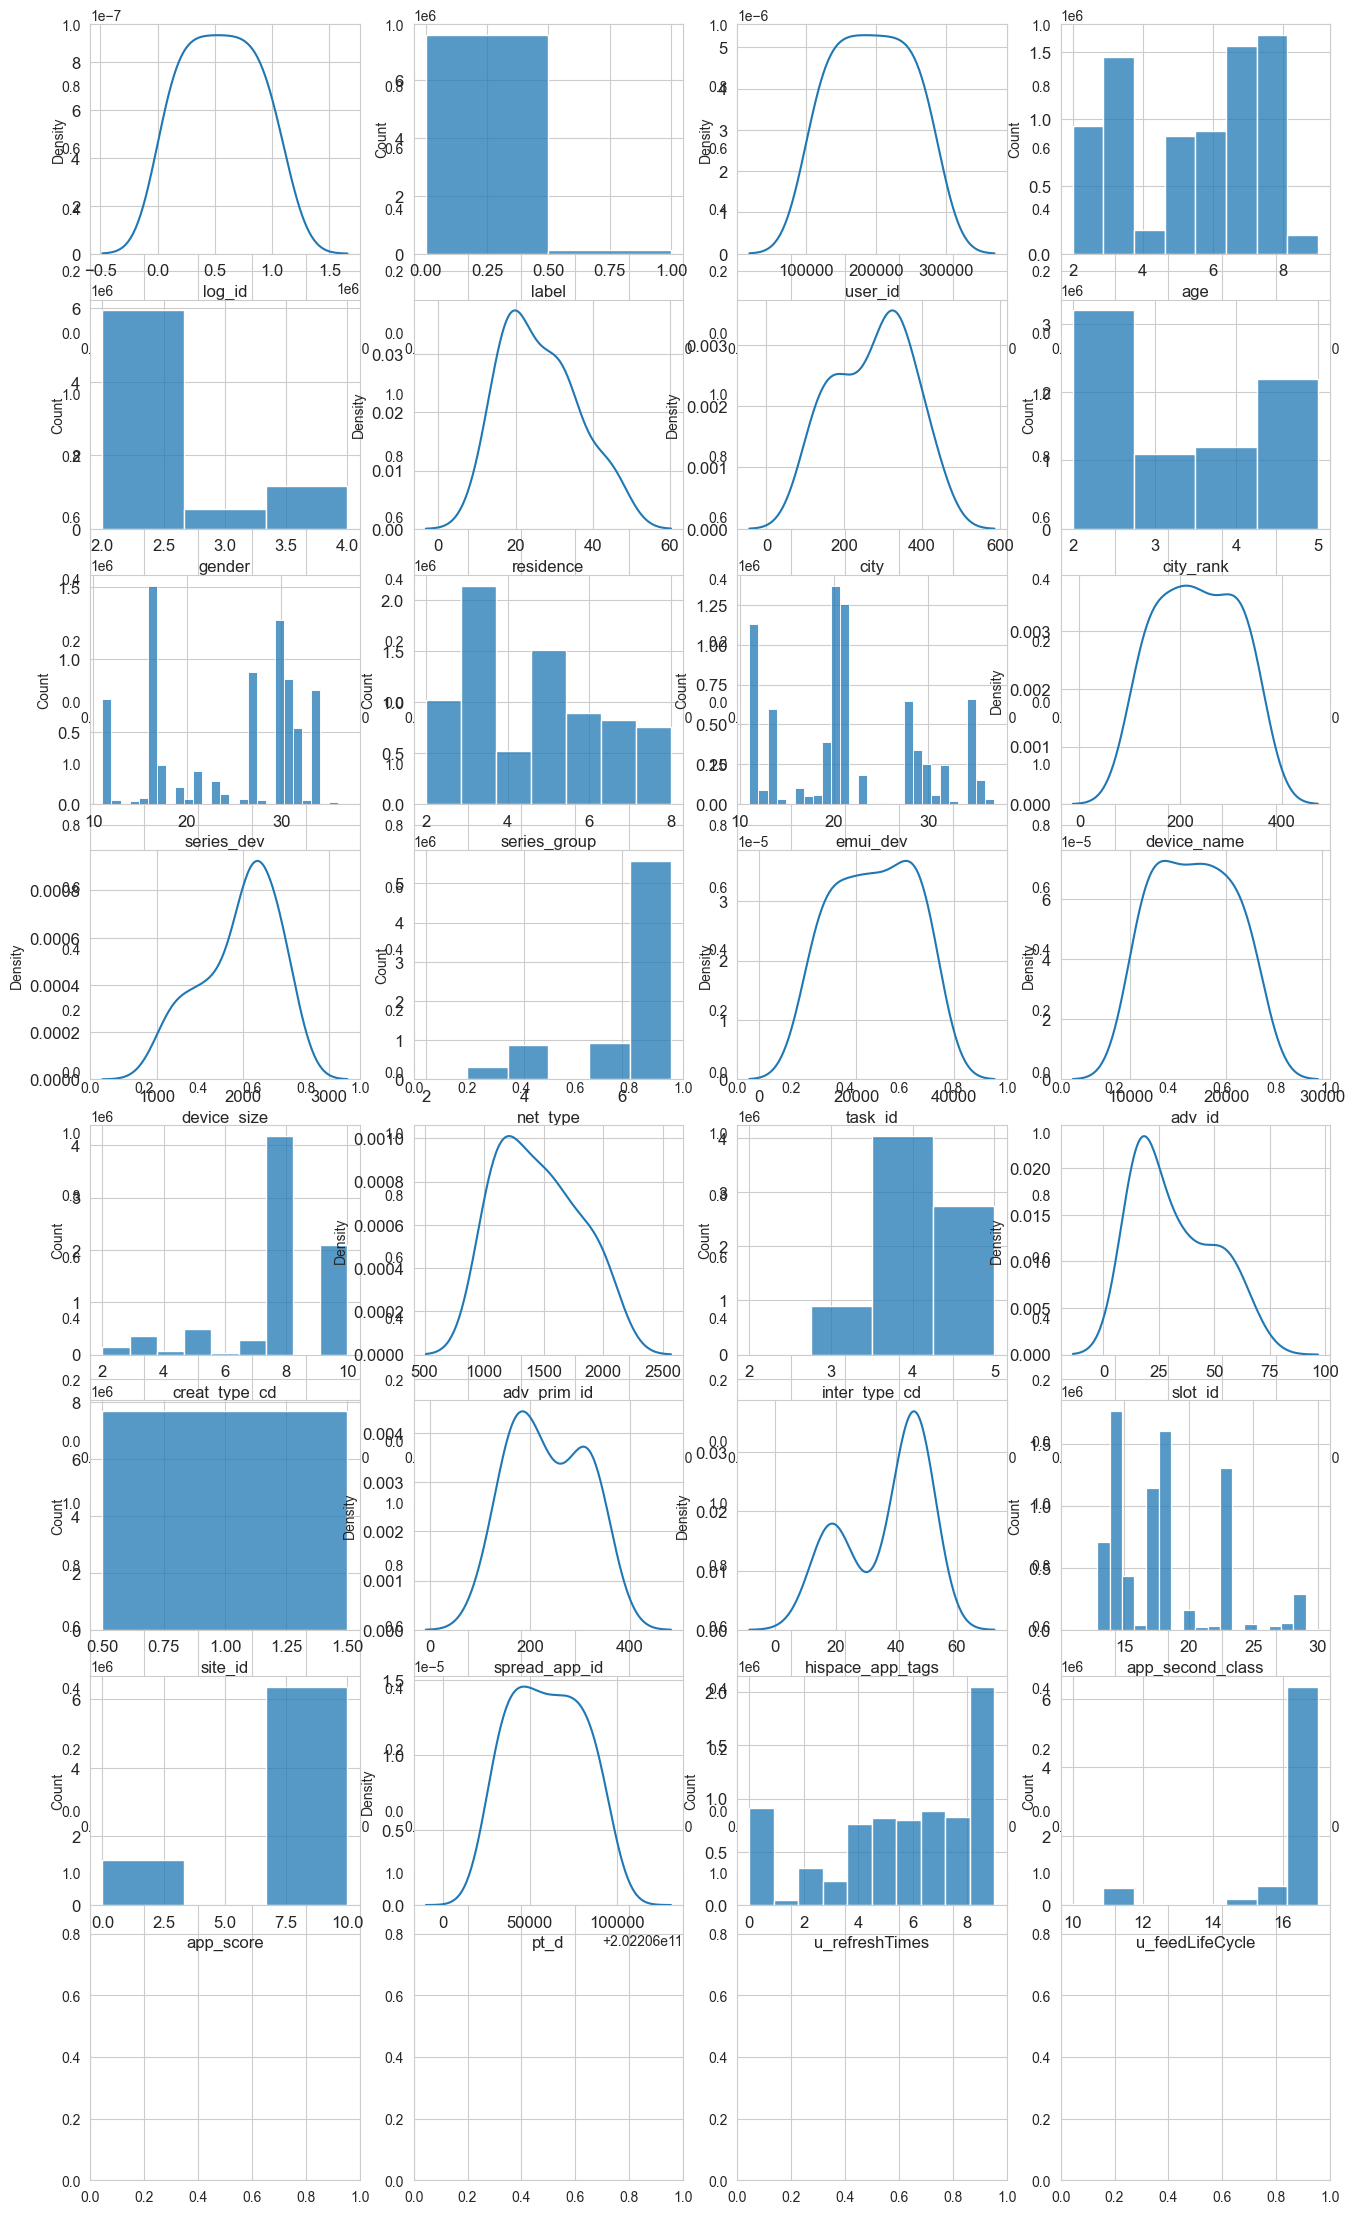

In [97]:
def classify_variable(series):
    if series.dtype in ['int64', 'float64']:
        unique_values = series.nunique()
        if unique_values < 30:  
            return 'Discrete'
        else:
            return 'Continuous'
    else:
        return 'Discrete'

variable_classification = pd.DataFrame({
    'Variable': df_without_objects.columns,
    'Type': df_without_objects.apply(classify_variable)
})


sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6, 4, figsize=(16, 28))

i = 0

for feature in df_without_objects.columns:
    i += 1
    plt.subplot(8, 4, i)
    if variable_classification[variable_classification['Variable'] == feature]['Type'].values[0] == 'Continuous':
        sns.kdeplot(df_without_objects[feature], bw=0.5, label="Class = 0")
    else:
        sns.histplot(df_without_objects[feature], kde=False, label="Class = 0", bins=len(df_without_objects[feature].unique()))
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/3109815625.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/3109815625.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/3109815625.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipyker

<Figure size 640x480 with 0 Axes>

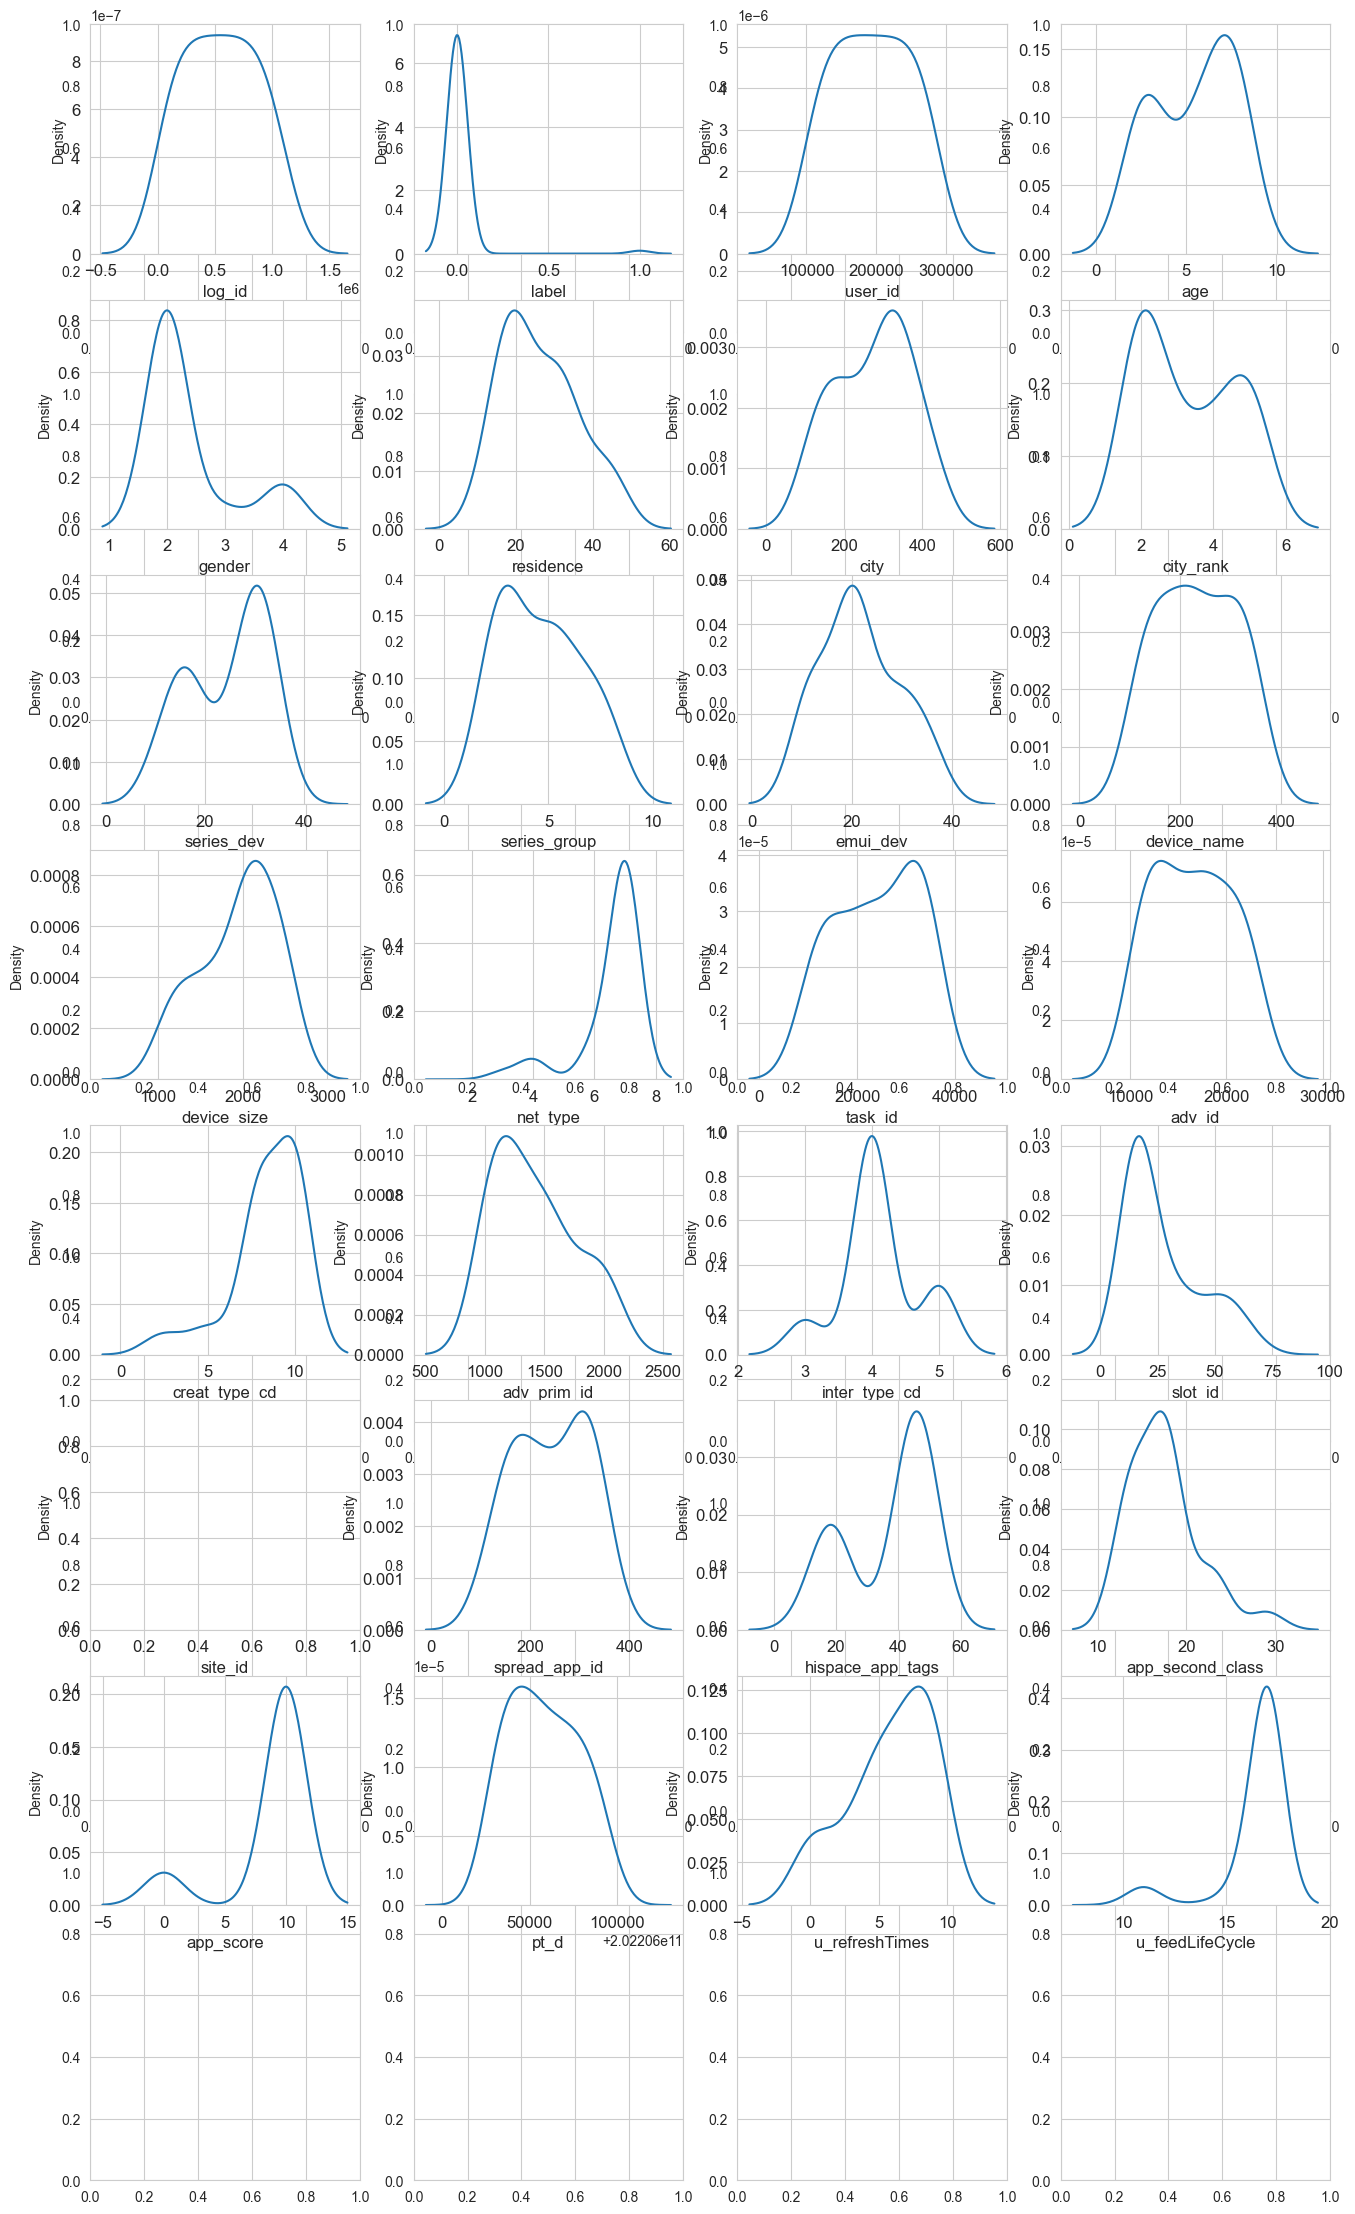

In [82]:
var = df_without_objects.columns.values

i = 0
t0 = df_without_objects 


sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [47]:
print(new_df.describe)

<bound method NDFrame.describe of          log_id  label  user_id  age  gender  residence  city  city_rank  \
1        373253      1   100005    3       2         16   147          2   
2        373252      1   100005    3       2         16   147          2   
3        373251      0   100005    3       2         16   147          2   
4        373255      0   100005    3       2         16   147          2   
5        373254      0   100005    3       2         16   147          2   
...         ...    ...      ...  ...     ...        ...   ...        ...   
7675508  650502      0   287180    6       4         33   319          3   
7675510  650495      0   287180    6       4         33   319          3   
7675512  650508      0   287180    6       4         33   319          3   
7675513  650492      0   287180    6       4         33   319          3   
7675514  650509      0   287180    6       4         33   319          3   

         series_dev  series_group  ...             ad

In [61]:
def calculate_label_rate(df):
        # Get the total number of samples
        total_samples = len(df)

        # Count the occurrences of each label in the 'label' column of df dataframe.
        label_counts = df['label'].value_counts()
        # Extract the count of positive labels (label == 1) from the label_counts series.
        positive_count = label_counts.get(1, 0)
        # Extract the count of negative labels (label == 0) from the label_counts series.
        negative_count = label_counts.get(0, 0)
        # Calculate the rate of positive labels to negative labels.
        #label_rate = positive_count / negative_count if negative_count != 0 else 0
        label_rate = positive_count / total_samples

        return label_rate

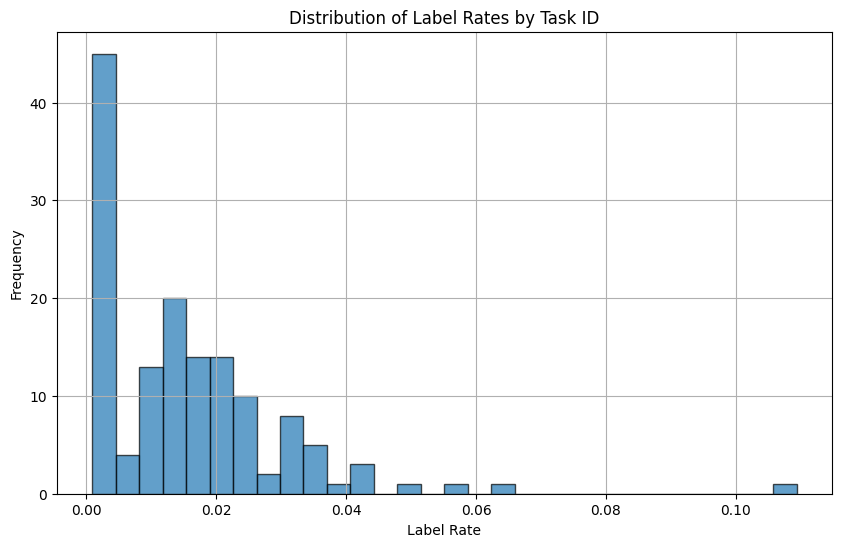

In [62]:
# Group the dataframe by 'task_id' and calculate the label rate for each group
grouped = new_df.groupby('task_id').apply(calculate_label_rate).reset_index(name='label_rate')

# Plot the distribution of the label rates
plt.figure(figsize=(10, 6))
plt.hist(grouped['label_rate'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Label Rates by Task ID')
plt.xlabel('Label Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [63]:
grouped['label_rate'].describe()

count    143.000000
mean       0.015591
std        0.014868
min        0.000912
25%        0.002545
50%        0.013729
75%        0.020613
max        0.109355
Name: label_rate, dtype: float64

In [6]:
df_ads = new_df
#df_ads = pd.read_csv('train_data_ads.csv')
df_feeds = pd.read_csv('train_data_feeds.csv')

In [11]:
def describe_dataframe(df):
    # Solution 1.1: Get the shape of the DataFrame
    shape_description = "(I) Shape of the DataFrame:\n"
    shape_description += f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.\n\n"

    # Solution 1.2: Get the columns of the DataFrame and format them
    columns = df.columns.tolist()
    columns_description = "(II) Columns of the DataFrame:\n"
    for i in range(0, len(columns),5):
        columns_description += ", ".join(columns[i:i+5]) + "\n"
    columns_description += "\n"

    # Solution 1.3: Get the number of unique values for each column, sorted by value
    unique_values = df.nunique().sort_values()
    unique_values_description = "(III) Number of unique values per column (sorted in ascending order):\n"
    unique_values_list = [f"{col}: {unique_values[col]}" for col in unique_values.index]
    for i in range(0, len(unique_values_list), 5):
        unique_values_description += ", ".join(unique_values_list[i:i+5]) + "\n"

    # Combine all descriptions
    full_description = f"{shape_description}{columns_description}{unique_values_description}"

    return full_description

In [33]:
description_ads = describe_dataframe(df_ads)
print(description_ads)

(I) Shape of the DataFrame:
The DataFrame has 5608520 rows and 35 columns.

(II) Columns of the DataFrame:
log_id, label, user_id, age, gender
residence, city, city_rank, series_dev, series_group
emui_dev, device_name, device_size, net_type, task_id
adv_id, creat_type_cd, adv_prim_id, inter_type_cd, slot_id
site_id, spread_app_id, hispace_app_tags, app_second_class, app_score
ad_click_list_v001, ad_click_list_v002, ad_click_list_v003, ad_close_list_v001, ad_close_list_v002
ad_close_list_v003, pt_d, u_newsCatInterestsST, u_refreshTimes, u_feedLifeCycle

(III) Number of unique values per column (sorted in ascending order):
site_id: 1, label: 2, app_score: 3, gender: 3, inter_type_cd: 4
city_rank: 4, net_type: 6, series_group: 7, age: 8, creat_type_cd: 8
u_feedLifeCycle: 8, u_refreshTimes: 10, app_second_class: 14, series_dev: 27, emui_dev: 27
hispace_app_tags: 27, residence: 35, slot_id: 58, spread_app_id: 69, adv_prim_id: 216
device_name: 254, city: 341, task_id: 679, adv_id: 847, devic

In [34]:
description_feeds = describe_dataframe(df_feeds)
print(description_feeds)

(I) Shape of the DataFrame:
The DataFrame has 3227732 rows and 28 columns.

(II) Columns of the DataFrame:
u_userId, u_phonePrice, u_browserLifeCycle, u_browserMode, u_feedLifeCycle
u_refreshTimes, u_newsCatInterests, u_newsCatDislike, u_newsCatInterestsST, u_click_ca2_news
i_docId, i_s_sourceId, i_regionEntity, i_cat, i_entities
i_dislikeTimes, i_upTimes, i_dtype, e_ch, e_m
e_po, e_pl, e_rn, e_section, e_et
label, cillabel, pro

(III) Number of unique values per column (sorted in ascending order):
label: 2, e_section: 2, cillabel: 2, i_dtype: 5, u_phonePrice: 7
u_browserLifeCycle: 8, u_browserMode: 8, u_feedLifeCycle: 8, u_refreshTimes: 10, i_upTimes: 10
i_dislikeTimes: 10, e_ch: 19, e_po: 27, pro: 85, e_rn: 99
i_cat: 208, e_m: 274, i_regionEntity: 378, u_newsCatDislike: 810, e_pl: 3113
e_et: 3663, i_s_sourceId: 4040, i_entities: 92746, i_docId: 98600, u_userId: 180123
u_newsCatInterests: 202636, u_newsCatInterestsST: 625044, u_click_ca2_news: 758921



In [9]:
def describe_common_ids(df_ads, df_feeds):
    # Solution 1: Print the number of unique matching IDs in both datasets
    unique_ads_ids = len(df_ads['user_id'].unique())
    unique_feeds_ids = len(df_feeds['u_userId'].unique())
    
    print(f"(I) Number of unique matching IDs:")
    print(f"    - Ads dataset: {unique_ads_ids}")
    print(f"    - Feeds dataset: {unique_feeds_ids}\n")

    # Solution 2: Find common IDs between both datasets
    ads_ids = set(df_ads['user_id'].unique())
    feeds_ids = set(df_feeds['u_userId'].unique())
    common_ids = ads_ids.intersection(feeds_ids)
    common_ids_count = len(common_ids)
    
    ads_common_percentage = (common_ids_count / unique_ads_ids) * 100
    feeds_common_percentage = (common_ids_count / unique_feeds_ids) * 100
    
    print(f"(II) Common IDs for data collaboration:")
    print(f"    - There are {common_ids_count} common IDs in both tables.")
    print(f"    - This represents {ads_common_percentage:.2f}% of the IDs in the ads dataset")
    print(f"    - And {feeds_common_percentage:.2f}% of the IDs in the feeds dataset.\n")

    # Solution 3: Define ad views without engagement and potential customers
    ad_views_without_engagement = feeds_ids - ads_ids
    potential_customers = common_ids
    
    total_unique_ids = unique_feeds_ids
    ad_views_without_engagement_percentage = (len(ad_views_without_engagement) / total_unique_ids) * 100
    potential_customers_percentage = (len(potential_customers) / total_unique_ids) * 100
    
    print(f"(III) Ad Views Without Engagement and Potential Customers:")
    print(f"    - Ad views without engagement: {len(ad_views_without_engagement)} ({ad_views_without_engagement_percentage:.2f}% of the total unique IDs)")
    print(f"    - Potential customers: {len(potential_customers)} ({potential_customers_percentage:.2f}% of the total unique IDs)\n")

# Example usage
# Assuming df_ads and df_feeds are your DataFrames
describe_common_ids(df_ads, df_feeds)

(I) Number of unique matching IDs:
    - Ads dataset: 60592
    - Feeds dataset: 180123

(II) Common IDs for data collaboration:
    - There are 60592 common IDs in both tables.
    - This represents 100.00% of the IDs in the ads dataset
    - And 33.64% of the IDs in the feeds dataset.

(III) Ad Views Without Engagement and Potential Customers:
    - Ad views without engagement: 119531 (66.36% of the total unique IDs)
    - Potential customers: 60592 (33.64% of the total unique IDs)



Ad views without engagement: 119531 (66.36% of the total unique IDs)
Potential customers: 60592 (33.64% of the total unique IDs)


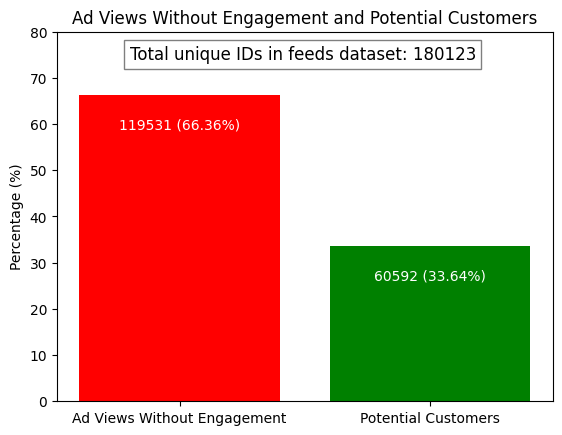

119531
60592
(I) Shape of the DataFrame:
The DataFrame has 773038 rows and 28 columns.

(II) Columns of the DataFrame:
u_userId, u_phonePrice, u_browserLifeCycle, u_browserMode, u_feedLifeCycle
u_refreshTimes, u_newsCatInterests, u_newsCatDislike, u_newsCatInterestsST, u_click_ca2_news
i_docId, i_s_sourceId, i_regionEntity, i_cat, i_entities
i_dislikeTimes, i_upTimes, i_dtype, e_ch, e_m
e_po, e_pl, e_rn, e_section, e_et
label, cillabel, pro

(III) Number of unique values per column (sorted in ascending order):
label: 2, e_section: 2, cillabel: 2, i_dtype: 5, u_phonePrice: 7
u_browserLifeCycle: 8, u_browserMode: 8, u_feedLifeCycle: 8, u_refreshTimes: 10, i_upTimes: 10
i_dislikeTimes: 10, e_ch: 19, e_po: 27, pro: 35, e_rn: 99
i_cat: 207, u_newsCatDislike: 236, e_m: 263, i_regionEntity: 365, i_s_sourceId: 2559
e_pl: 3090, e_et: 3565, i_entities: 49373, i_docId: 51884, u_newsCatInterests: 76592
u_newsCatInterestsST: 109577, u_userId: 119531, u_click_ca2_news: 155948

(I) Shape of the DataF

In [12]:
def calculate_and_visualize_common_ids(df_ads, df_feeds):
    # Find unique IDs in both datasets
    ads_ids = set(df_ads['user_id'].unique())
    feeds_ids = set(df_feeds['u_userId'].unique())
    common_ids = ads_ids.intersection(feeds_ids)
    
    # Define ad views without engagement and potential customers
    ad_views_without_engagement = feeds_ids - ads_ids
    potential_customers = common_ids
    
    total_unique_ids = len(feeds_ids)
    ad_views_without_engagement_count = len(ad_views_without_engagement)
    potential_customers_count = len(potential_customers)
    
    ad_views_without_engagement_percentage = (ad_views_without_engagement_count / total_unique_ids) * 100
    potential_customers_percentage = (potential_customers_count / total_unique_ids) * 100

    # Print the percentages
    print(f"Ad views without engagement: {ad_views_without_engagement_count} ({ad_views_without_engagement_percentage:.2f}% of the total unique IDs)")
    print(f"Potential customers: {potential_customers_count} ({potential_customers_percentage:.2f}% of the total unique IDs)")

    # Visualization
    labels = ['Ad Views Without Engagement', 'Potential Customers']
    counts = [ad_views_without_engagement_count, potential_customers_count]
    percentages = [ad_views_without_engagement_percentage, potential_customers_percentage]

    fig, ax = plt.subplots()

    bars = ax.bar(labels, percentages, color=['red', 'green'])
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 80)
    ax.set_title('Ad Views Without Engagement and Potential Customers')

    for bar, count, percentage in zip(bars, counts, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height - 5, f"{count} ({percentage:.2f}%)", ha='center', va='top', color='white')

    total_text = f"Total unique IDs in feeds dataset: {total_unique_ids}"
    plt.text(-0.2, 75, total_text, ha='left', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    
    plt.show()
    ad_views_without_engagement_df = df_feeds[df_feeds['u_userId'].isin(ad_views_without_engagement)]
    potential_customers_df = df_feeds[df_feeds['u_userId'].isin(potential_customers)]
    test_ids = set(ad_views_without_engagement_df['u_userId'].unique())
    test_ids2 = set(potential_customers_df['u_userId'].unique())
    print(len(test_ids))
    print(len(test_ids2))
    print(describe_dataframe(ad_views_without_engagement_df))
    print(describe_dataframe(potential_customers_df))
    ad_views_without_engagement_df.to_csv('ad_views_without_engagement.csv', index=False)
    potential_customers_df.to_csv('potential_customers.csv', index=False)

# Example usage
# Assuming df_ads and df_feeds are your DataFrames
calculate_and_visualize_common_ids(df_ads, df_feeds)

In [3]:
df_ad_views_without_engagement = pd.read_csv('ad_views_without_engagement.csv')
df_potential_customers = pd.read_csv('potential_customers.csv')

In [4]:
half_df_ad_views_without_engagement = df_ad_views_without_engagement.sample(frac=0.3)
half_df_potential_customer = df_potential_customers.sample(frac = 0.1)
half_df_ad_views_without_engagement.to_csv('half_df_ad_views_without_engagement.csv')
half_df_potential_customer.to_csv('half_df_potential_customer.csv')

In [40]:
print(df_ad_views_without_engagement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755522 entries, 0 to 755521
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   u_userId              755522 non-null  int64 
 1   u_phonePrice          755522 non-null  int64 
 2   u_browserLifeCycle    755522 non-null  int64 
 3   u_browserMode         755522 non-null  int64 
 4   u_feedLifeCycle       755522 non-null  int64 
 5   u_refreshTimes        755522 non-null  int64 
 6   u_newsCatInterests    755522 non-null  object
 7   u_newsCatDislike      755522 non-null  object
 8   u_newsCatInterestsST  755522 non-null  object
 9   u_click_ca2_news      755522 non-null  object
 10  i_docId               755522 non-null  object
 11  i_s_sourceId          755522 non-null  object
 12  i_regionEntity        755522 non-null  int64 
 13  i_cat                 755522 non-null  int64 
 14  i_entities            732788 non-null  object
 15  i_dislikeTimes   

In [20]:
print(df_potential_customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475843 entries, 0 to 2475842
Data columns (total 28 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   u_userId              int64 
 1   u_phonePrice          int64 
 2   u_browserLifeCycle    int64 
 3   u_browserMode         int64 
 4   u_feedLifeCycle       int64 
 5   u_refreshTimes        int64 
 6   u_newsCatInterests    object
 7   u_newsCatDislike      object
 8   u_newsCatInterestsST  object
 9   u_click_ca2_news      object
 10  i_docId               object
 11  i_s_sourceId          object
 12  i_regionEntity        int64 
 13  i_cat                 int64 
 14  i_entities            object
 15  i_dislikeTimes        int64 
 16  i_upTimes             int64 
 17  i_dtype               int64 
 18  e_ch                  int64 
 19  e_m                   int64 
 20  e_po                  int64 
 21  e_pl                  int64 
 22  e_rn                  int64 
 23  e_section             int64 
 24

In [21]:
print(df_ad_views_without_engagement.describe())
print(df_potential_customers.describe())

            u_userId   u_phonePrice  u_browserLifeCycle  u_browserMode  \
count  751889.000000  751889.000000       751889.000000  751889.000000   
mean   193523.278943      13.286928           15.813466      13.322755   
std     54193.888222       2.142648            2.176203       1.601761   
min    100001.000000      10.000000           10.000000      10.000000   
25%    146746.000000      11.000000           16.000000      13.000000   
50%    193445.000000      14.000000           17.000000      14.000000   
75%    240599.000000      15.000000           17.000000      14.000000   
max    287184.000000      16.000000           17.000000      17.000000   

       u_feedLifeCycle  u_refreshTimes  i_regionEntity          i_cat  \
count    751889.000000   751889.000000   751889.000000  751889.000000   
mean         14.925685        2.439985      529.393680     115.165717   
std           2.501350        2.955928      929.280628      62.981237   
min          10.000000        0.000000   

In [22]:
print(df_ad_views_without_engagement.isnull().sum())
print(df_potential_customers.isnull().sum())

u_userId                    0
u_phonePrice                0
u_browserLifeCycle          0
u_browserMode               0
u_feedLifeCycle             0
u_refreshTimes              0
u_newsCatInterests          0
u_newsCatDislike            0
u_newsCatInterestsST        0
u_click_ca2_news            0
i_docId                     0
i_s_sourceId                0
i_regionEntity              0
i_cat                       0
i_entities              22644
i_dislikeTimes              0
i_upTimes                   0
i_dtype                     0
e_ch                        0
e_m                         0
e_po                        0
e_pl                        0
e_rn                        0
e_section                   0
e_et                        0
label                       0
cillabel                    0
pro                         0
dtype: int64
u_userId                    0
u_phonePrice                0
u_browserLifeCycle          0
u_browserMode               0
u_feedLifeCycle            

In [23]:
print(df_ad_views_without_engagement.nunique())
print(df_potential_customers.nunique())

u_userId                114826
u_phonePrice                 7
u_browserLifeCycle           8
u_browserMode                8
u_feedLifeCycle              8
u_refreshTimes              10
u_newsCatInterests       73674
u_newsCatDislike           231
u_newsCatInterestsST    107272
u_click_ca2_news        151435
i_docId                  51622
i_s_sourceId              2552
i_regionEntity             364
i_cat                      207
i_entities               49133
i_dislikeTimes              10
i_upTimes                   10
i_dtype                      5
e_ch                        19
e_m                        262
e_po                        27
e_pl                      3089
e_rn                        99
e_section                    2
e_et                      3561
label                        2
cillabel                     2
pro                         35
dtype: int64
u_userId                 65297
u_phonePrice                 7
u_browserLifeCycle           8
u_browserMode             

In [55]:
class_0 = df_ad_views_without_engagement["e_et"]
class_1 = df_potential_customers['e_et']

hist_data = [class_0, class_1]
group_labels = ['ad_views_without_engagement', 'Potential']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Potential customers Time Density Plot', xaxis=dict(title='TimeStamp [s]'))
iplot(fig, filename='dist_only')

In [56]:
from scipy.stats import ttest_ind, ks_2samp
t_stat, p_value = ttest_ind(df_ad_views_without_engagement['e_et'],df_potential_customers['e_et'])
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
ks_result = ks_2samp(df_ad_views_without_engagement['e_et'],df_potential_customers['e_et'])
print(ks_result)

T-statistic: -20.77908598064163
P-value: 6.789827873069778e-96
KstestResult(statistic=0.016441062699045217, pvalue=2.647171727305558e-136, statistic_location=202206061924, statistic_sign=1)


In [14]:
object_columns = df_ad_views_without_engagement.select_dtypes(include=['object']).columns
df_without_objects = df_ad_views_without_engagement.drop(columns=object_columns)

In [15]:
object_columns2 = df_potential_customers.select_dtypes(include=['object']).columns
df_without_objects2 = df_potential_customers.drop(columns=object_columns)

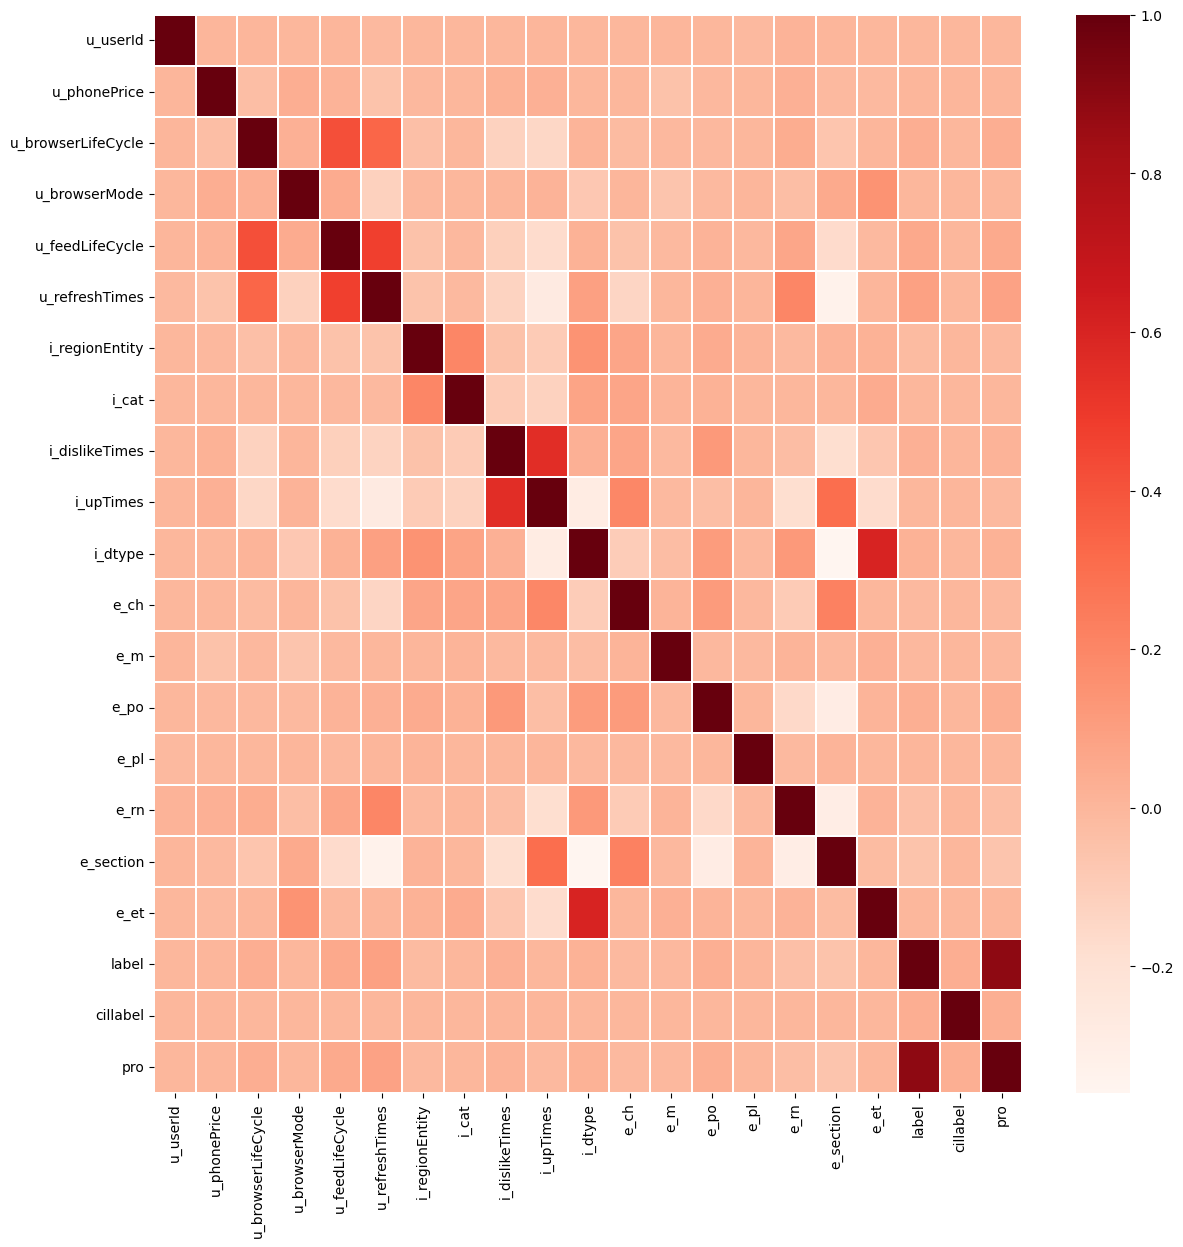

In [61]:
import seaborn as sns
plt.figure(figsize = (14,14))
plt.title('')
corr = df_without_objects.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

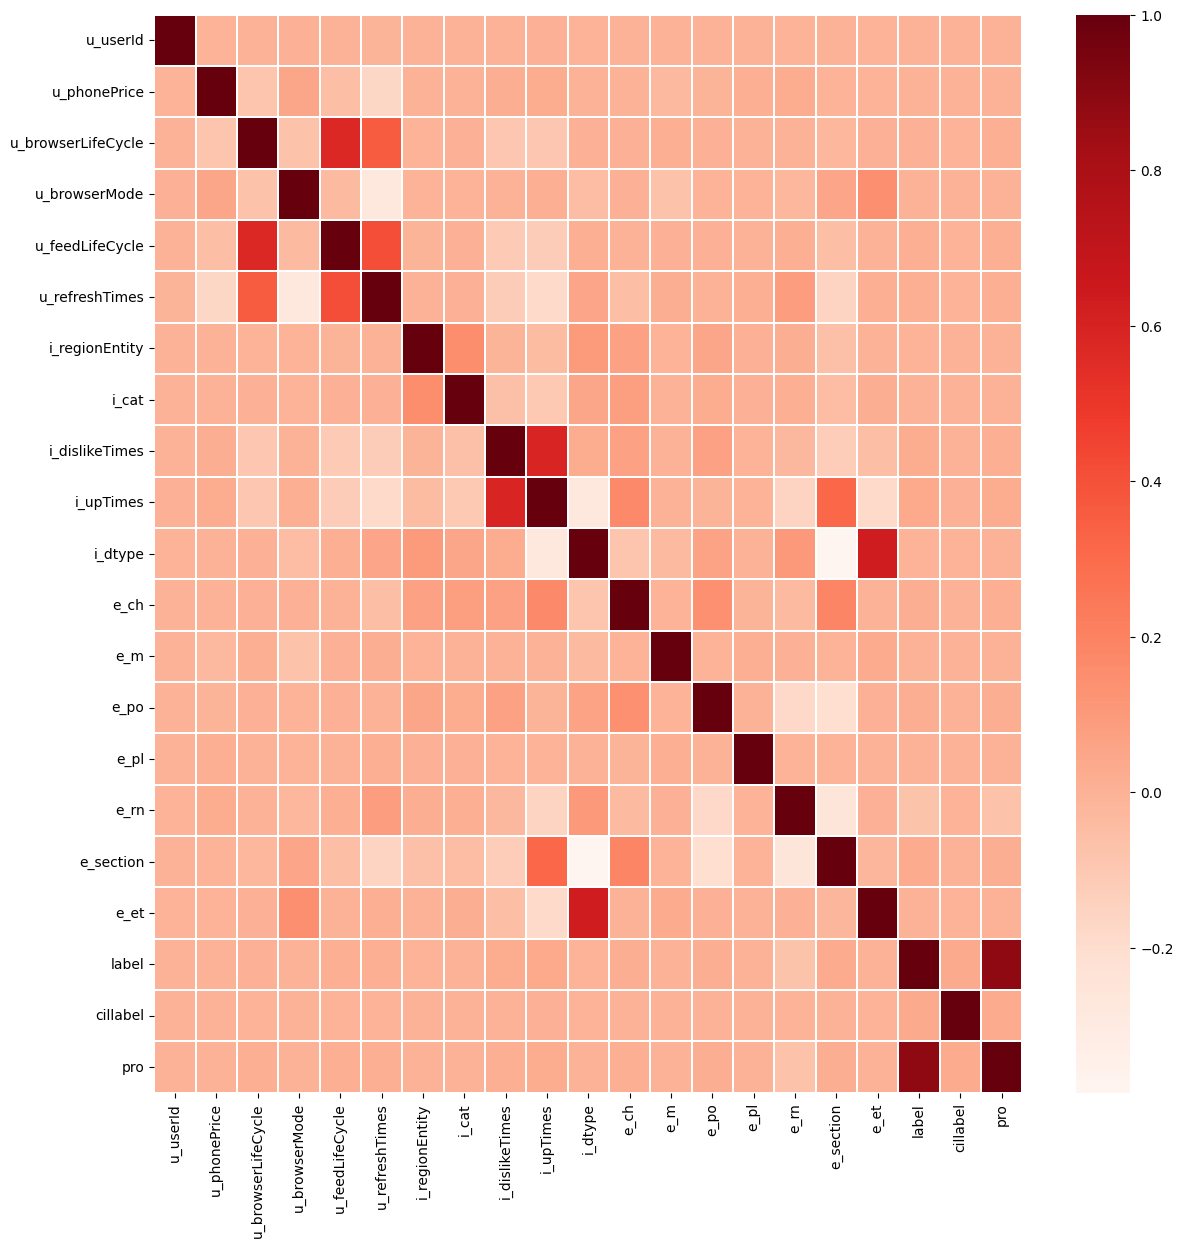

In [64]:

plt.figure(figsize = (14,14))
plt.title('')
corr = df_without_objects2.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [84]:
df1 = df_without_objects
df1.insert(df1.shape[1],'class',0)


In [86]:
df2 = df_without_objects2
df2.insert(df2.shape[1],'class',1)

ValueError: cannot insert class, already exists

In [87]:
combined_df = pd.concat([df1, df2],ignore_index= True)


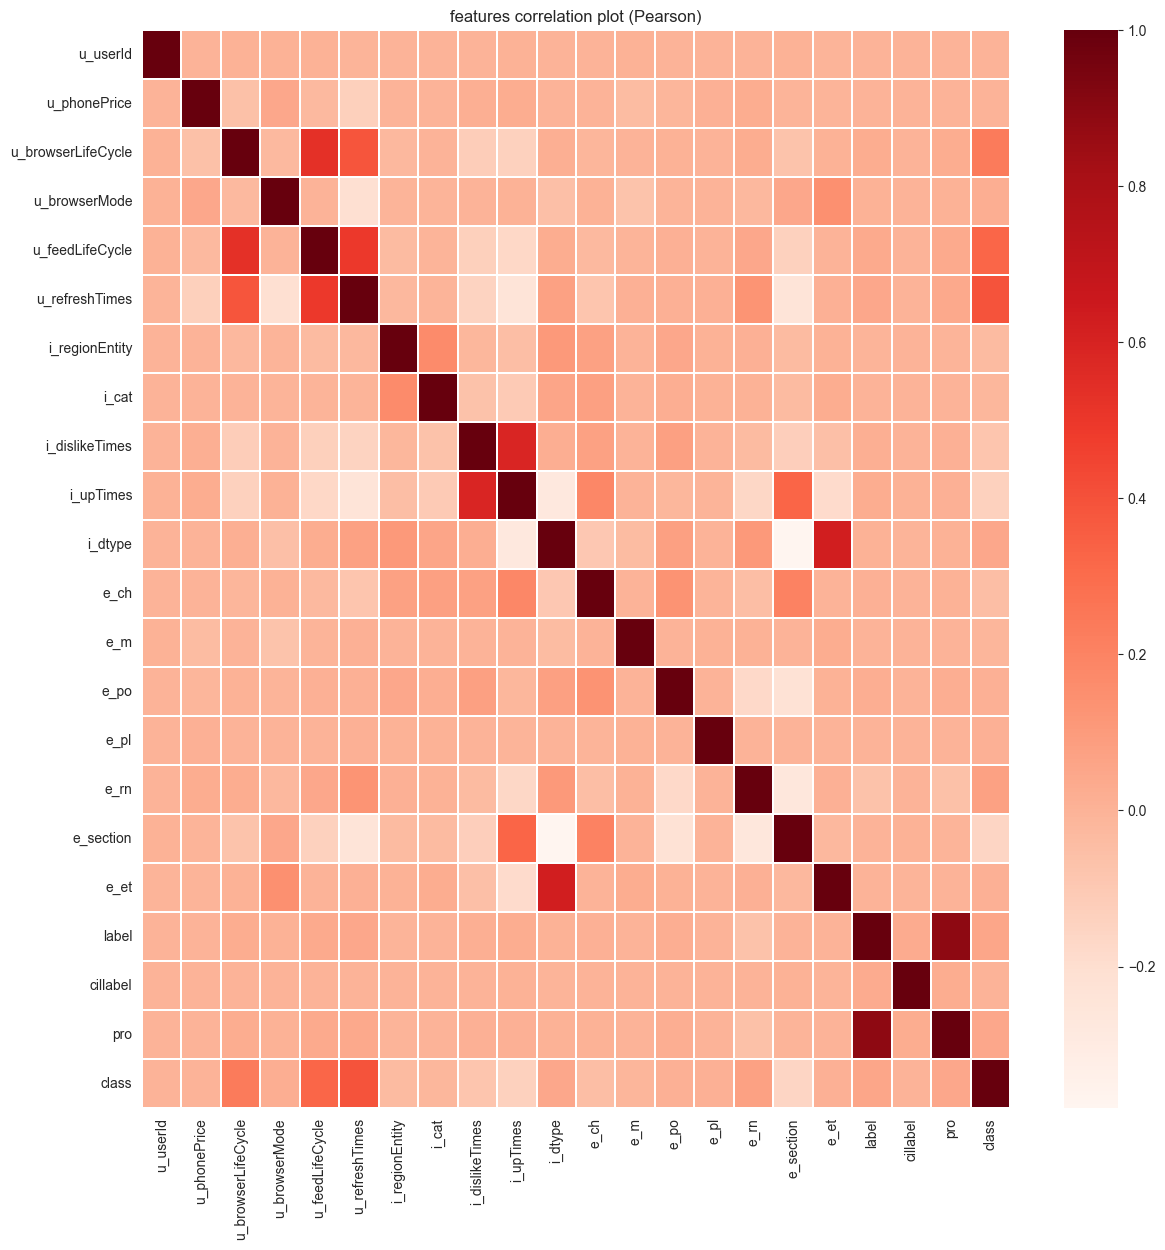

In [95]:
plt.figure(figsize = (14,14))
plt.title('features correlation plot (Pearson)')
corr = combined_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

KeyboardInterrupt: 

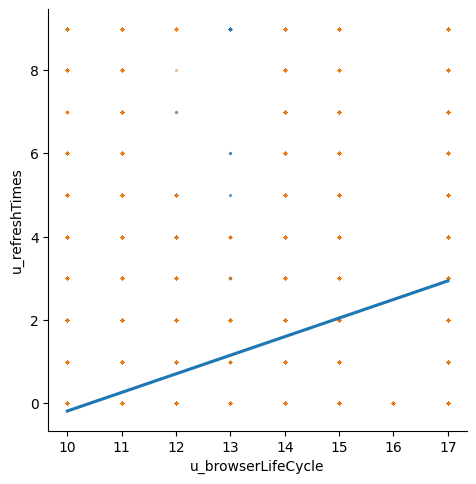

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

s = sns.lmplot(x='u_browserLifeCycle', y='u_refreshTimes', data=combined_df, hue='class', fit_reg=True, scatter_kws={'s':2, 'alpha':0.1})


sns.kdeplot(x='u_browserLifeCycle', y='u_refreshTimes', data=combined_df, shade=True, cmap='magma')

plt.show()


In [ ]:
s = sns.lmplot(x='u_feedLifeCycle', y='u_refreshTimes', data=combined_df, hue='class', fit_reg=True, scatter_kws={'s':2, 'alpha':0.1})

sns.kdeplot(x='u_feedLifeCycle', y='u_refreshTimes', data=combined_df, shade=True, cmap='magma')

plt.show()

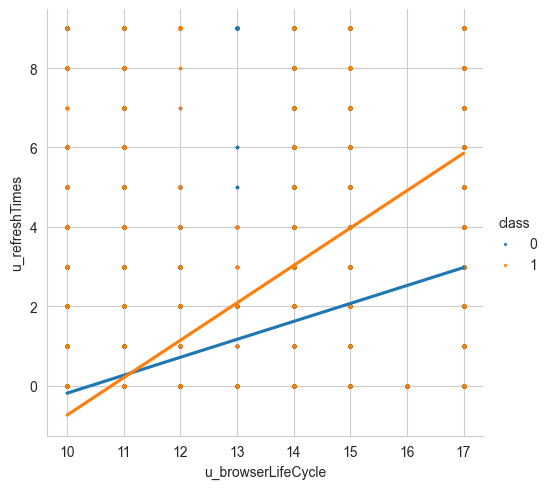

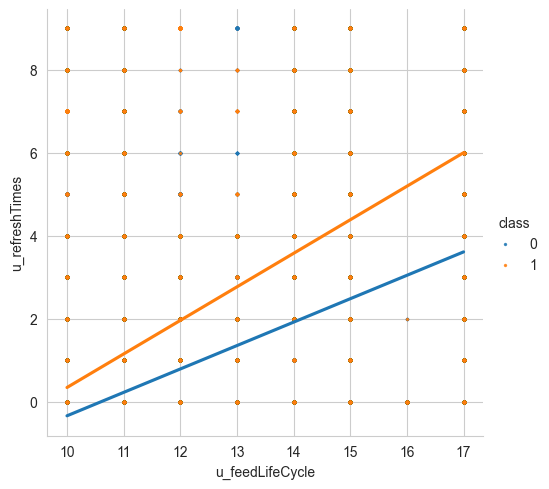

In [116]:

s = sns.lmplot(x='u_browserLifeCycle', y='u_refreshTimes',data=combined_df, hue='class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='u_feedLifeCycle', y='u_refreshTimes',data=combined_df, hue='class', fit_reg=True,scatter_kws={'s':2})

plt.show()

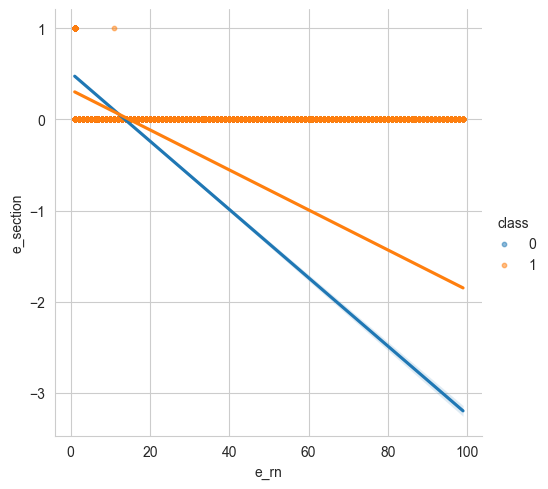

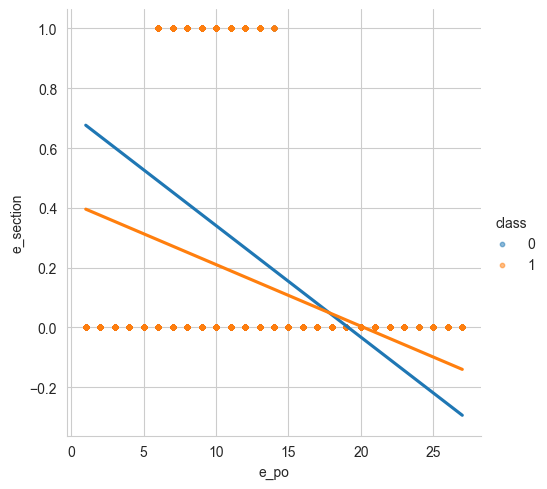

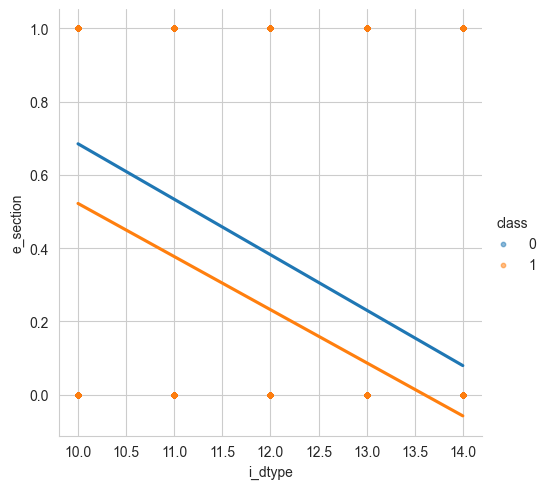

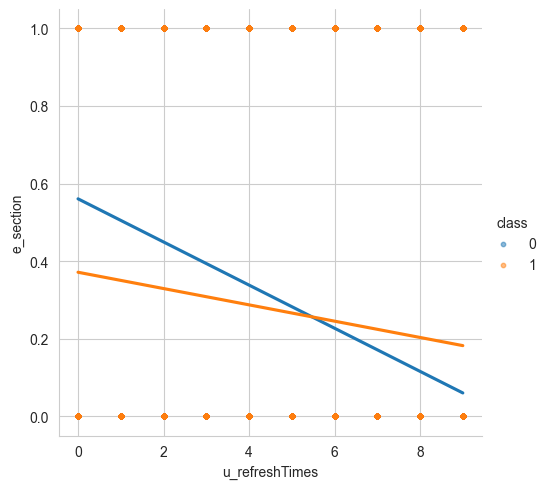

In [115]:
s = sns.lmplot(x='e_rn', y='e_section',data=combined_df, hue='class', fit_reg=True,scatter_kws={'s':2, 'alpha':0.5})
s = sns.lmplot(x='e_po', y='e_section',data=combined_df, hue='class', fit_reg=True,scatter_kws={'s':2, 'alpha':0.5})
s = sns.lmplot(x='i_dtype', y='e_section',data=combined_df, hue='class', fit_reg=True,scatter_kws={'s':2, 'alpha':0.5})
s = sns.lmplot(x='u_refreshTimes', y='e_section',data=combined_df, hue='class', fit_reg=True,scatter_kws={'s':2, 'alpha':0.5})
plt.show()

In [90]:
assert not variable_classification.empty, "Variable classification dataframe is empty."
assert variable_classification['Variable'].nunique() == len(df_without_objects2.columns), "Not all variables are classified."


In [91]:
if feature in variable_classification['Variable'].values:
    var_type = variable_classification[variable_classification['Variable'] == feature]['Type'].values
    
    if len(var_type) > 0 and var_type[0] == 'Continuous':
        sns.kdeplot(t0[feature], bw=0.5, label="Class = 0")
        sns.kdeplot(t1[feature], bw=0.5, label="Class = 1")
    elif len(var_type) > 0:
        sns.histplot(t0[feature], kde=False, label="Class = 0", bins=len(t0[feature].unique()), color='blue', alpha=0.5)
        sns.histplot(t1[feature], kde=False, label="Class = 1", bins=len(t1[feature].unique()), color='orange', alpha=0.5)


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_22545/2841217534.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_22545/2841217534.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_22545/2841217534.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipyker

<Figure size 640x480 with 0 Axes>

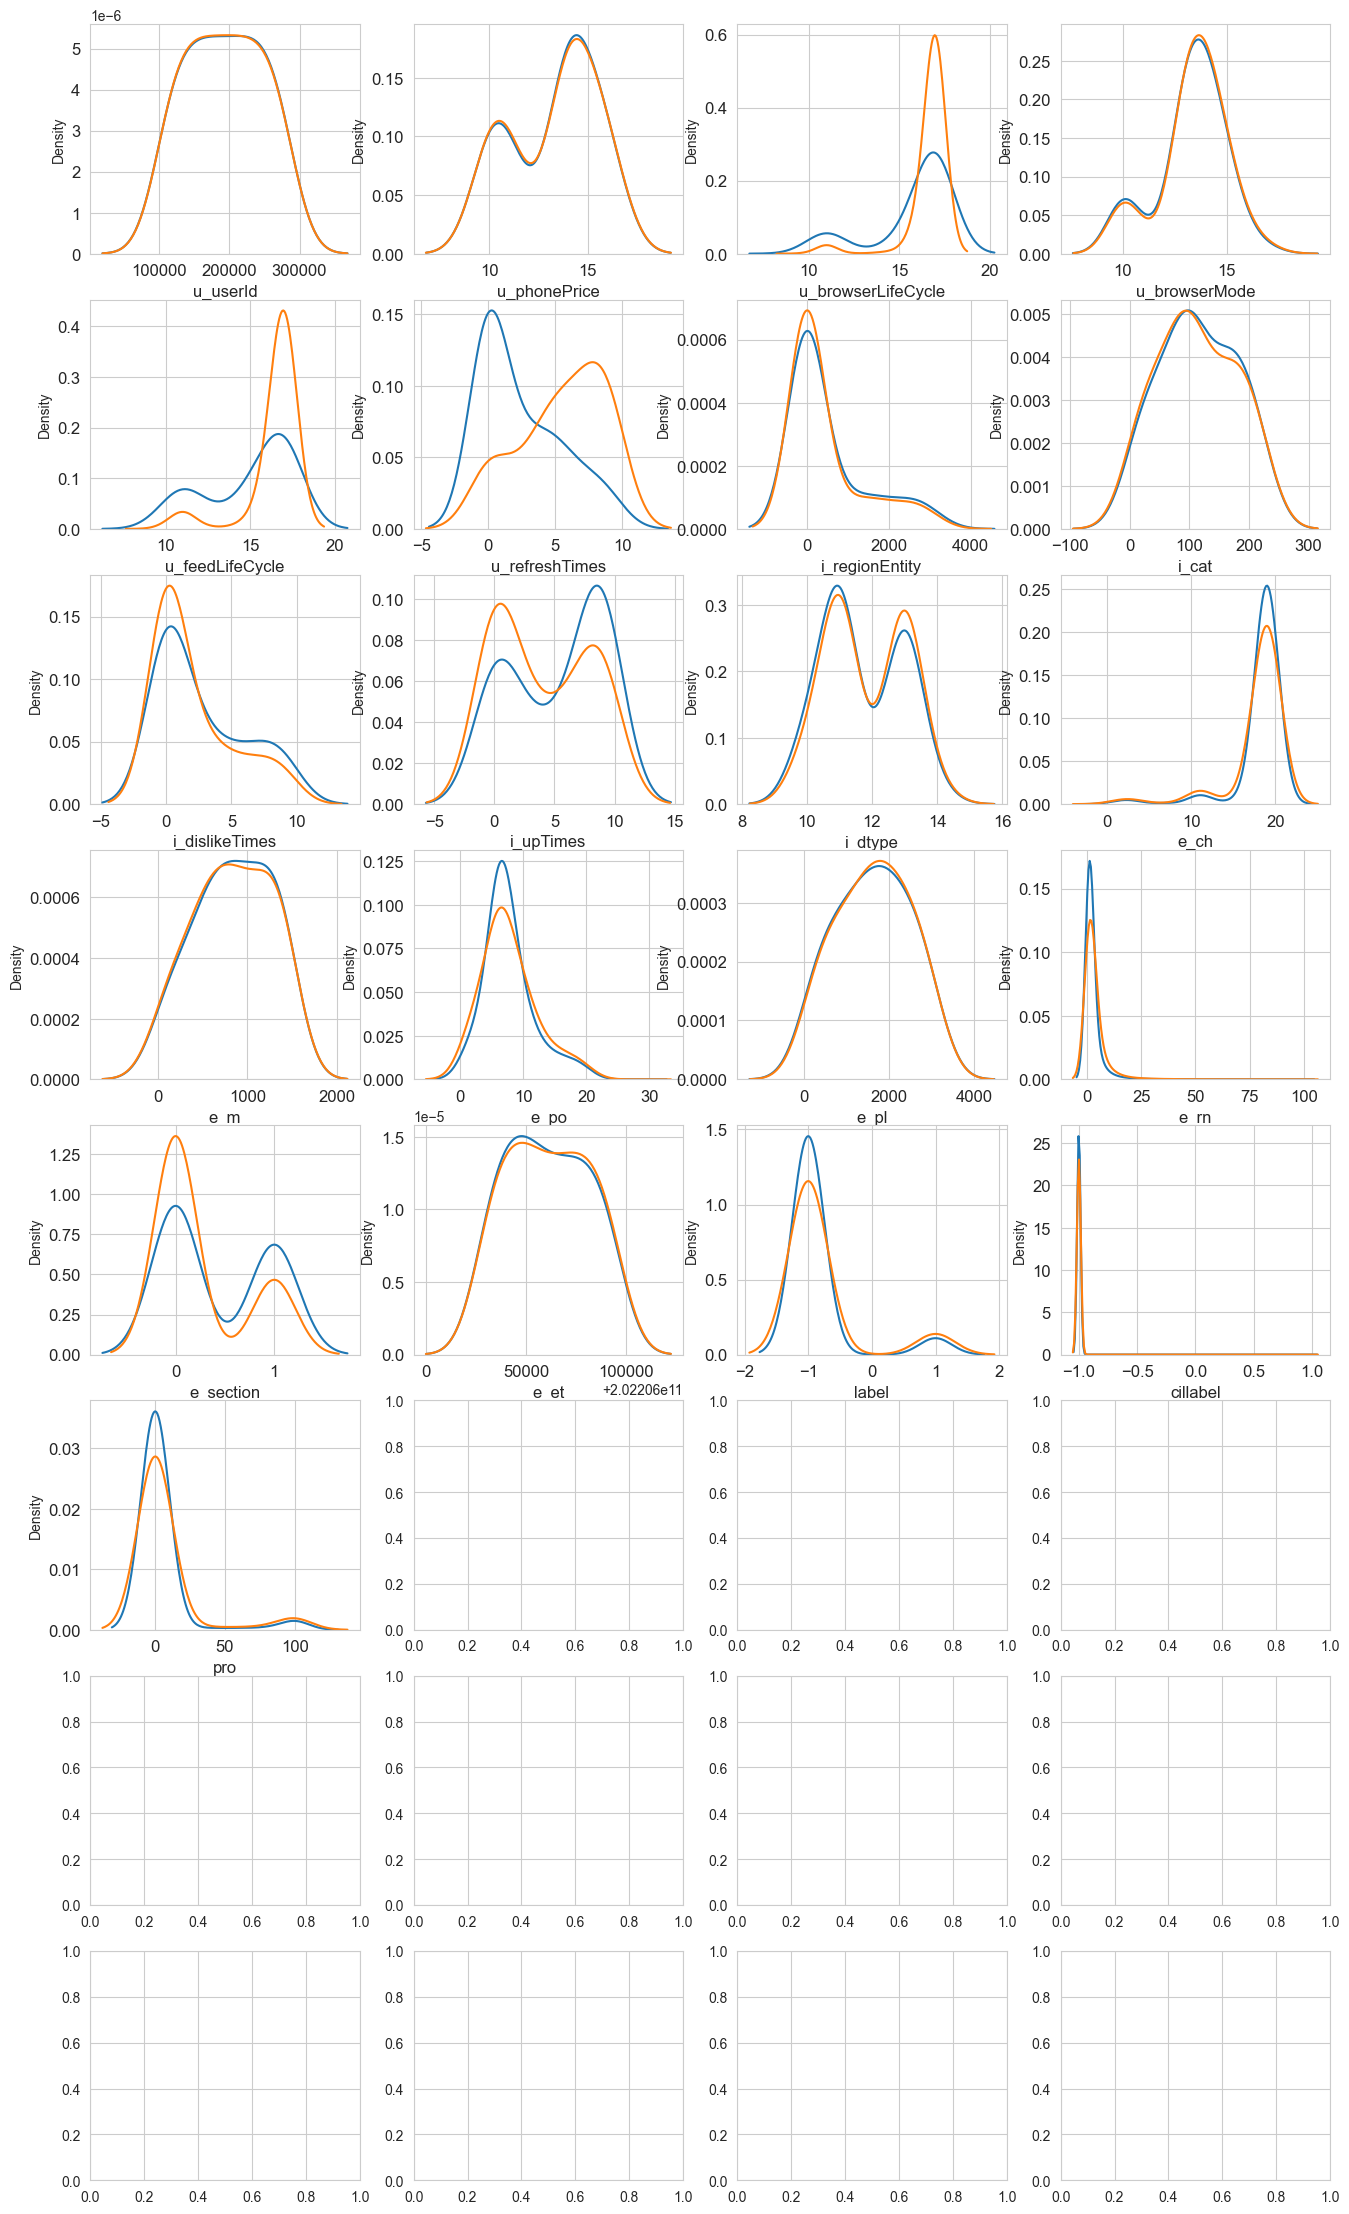

In [65]:
var = df_without_objects2.columns.values

i = 0
t0 = df_without_objects #not potential
t1 = df_without_objects2 #potential

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf = RandomForestClassifier(n_jobs=-1, 
                             random_state=2024,
                             criterion='gini',
                             n_estimators=200,
                             verbose=False)

In [130]:
print(combined_df.columns)

Index(['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro', 'class'],
      dtype='object')


In [31]:
target = 'class'
predictors = ['u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro']
clf.fit(combined_df[predictors], combined_df[target].values)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=2024,
                       verbose=False)

/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/1428594667.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



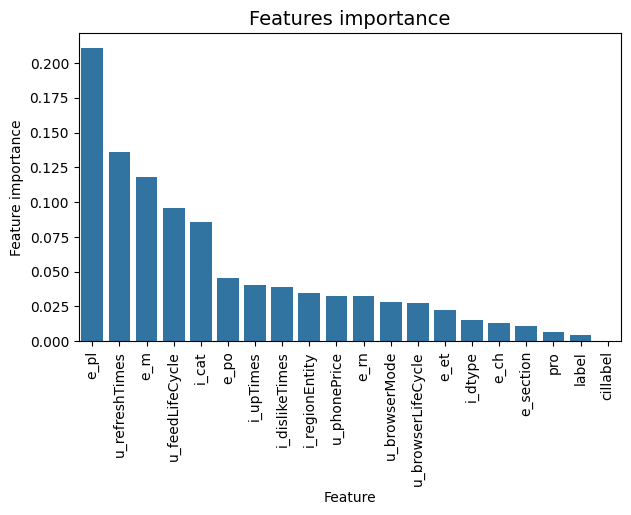

In [32]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [35]:
from scipy.stats import ttest_ind, ks_2samp
t_stat, p_value = ttest_ind(df_ad_views_without_engagement['e_pl'],df_potential_customers['e_pl'])
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
ks_result = ks_2samp(df_ad_views_without_engagement['e_pl'],df_potential_customers['e_pl'])
print(ks_result)

T-statistic: -13.494835638736578
P-value: 1.68164910202027e-41
KstestResult(statistic=0.014521468302746754, pvalue=4.08897297790306e-108, statistic_location=1358, statistic_sign=1)


In [36]:
from scipy.stats import ttest_ind, ks_2samp
t_stat, p_value = ttest_ind(df_ad_views_without_engagement['u_refreshTimes'],df_potential_customers['u_refreshTimes'])
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
ks_result = ks_2samp(df_ad_views_without_engagement['u_refreshTimes'],df_potential_customers['u_refreshTimes'])
print(ks_result)

T-statistic: -793.0484612492469
P-value: 0.0
KstestResult(statistic=0.4219041262761701, pvalue=0.0, statistic_location=3, statistic_sign=1)


In [40]:
df2_resampled = df2.sample(n=len(df1))

In [48]:
from scipy.stats import ttest_ind, ks_2samp
t_stat, p_value = ttest_ind(df2_resampled['e_pl'],df1['e_pl'])
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
ks_result = ks_2samp(df2_resampled['e_pl'],df1['e_pl'])
print(ks_result)

T-statistic: 10.798244390237306
P-value: 3.516330333681487e-27
KstestResult(statistic=0.014542622742995837, pvalue=1.956657769703371e-71, statistic_location=1358, statistic_sign=-1)


In [49]:
from scipy.stats import ttest_ind, ks_2samp
t_stat, p_value = ttest_ind(df1['u_refreshTimes'],df2_resampled['u_refreshTimes'])
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
ks_result = ks_2samp(df1['u_refreshTimes'],df2_resampled['u_refreshTimes'])
print(ks_result)

T-statistic: -651.9607638530227
P-value: 0.0
KstestResult(statistic=0.4221590659191399, pvalue=0.0, statistic_location=3, statistic_sign=1)


In [50]:
class_0 = df_ad_views_without_engagement["e_et"]
class_1 = df2_resampled['e_et']

hist_data = [class_0, class_1]
group_labels = ['ad_views_without_engagement', 'Potential']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Potential customers Time Density Plot', xaxis=dict(title='TimeStamp [s]'))
iplot(fig, filename='dist_only')

In [51]:
from scipy.stats import ttest_ind, ks_2samp
t_stat, p_value = ttest_ind(df_ad_views_without_engagement['e_et'],df2_resampled['e_et'])
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
ks_result = ks_2samp(df_ad_views_without_engagement['e_et'],df2_resampled['e_et'])
print(ks_result)

T-statistic: -16.376424546777294
P-value: 2.8515188356915834e-60
KstestResult(statistic=0.016321319262442402, pvalue=7.2193514347405044e-90, statistic_location=202206061924, statistic_sign=1)


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/469714989.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/469714989.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




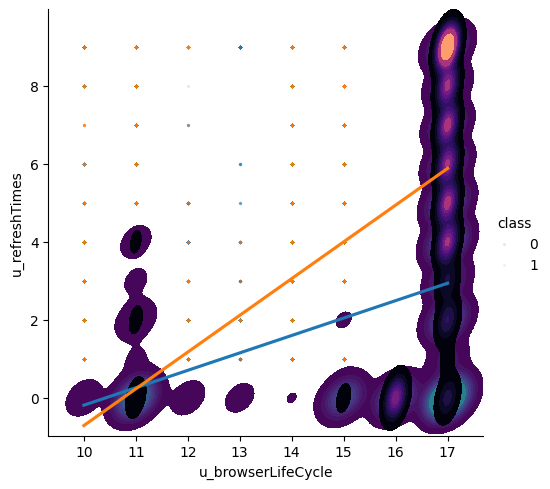

In [56]:
ncombined_df = pd.concat([df1, df2_resampled],ignore_index= True)
s = sns.lmplot(x='u_browserLifeCycle', y='u_refreshTimes', data=ncombined_df, hue='class', fit_reg=True, scatter_kws={'s':2, 'alpha':0.1})

sns.kdeplot(x='u_browserLifeCycle', y='u_refreshTimes', data=df1, shade=True, cmap='viridis')
sns.kdeplot(x='u_browserLifeCycle', y='u_refreshTimes', data=df2_resampled, shade=True, cmap='magma')



plt.show()

/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/2374966286.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/2374966286.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




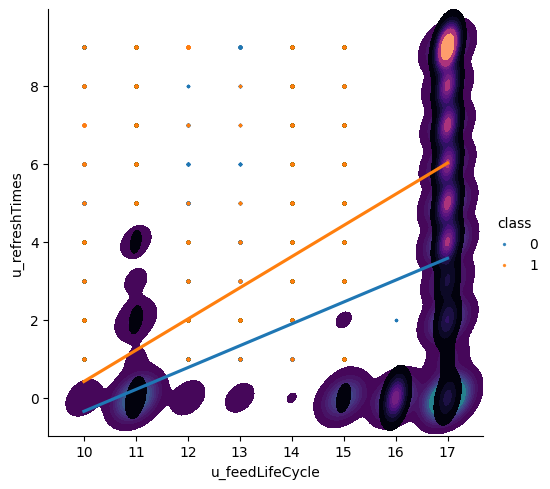

In [65]:
s = sns.lmplot(x='u_feedLifeCycle', y='u_refreshTimes',data=ncombined_df, hue='class', fit_reg=True,scatter_kws={'s':2})
sns.kdeplot(x='u_browserLifeCycle', y='u_refreshTimes', data=df1, shade=True, cmap='viridis')
sns.kdeplot(x='u_browserLifeCycle', y='u_refreshTimes', data=df2_resampled, shade=True, cmap='magma')
plt.show()

/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/1954080624.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/1954080624.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/1954080624.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/kp/5sffjpx16mn8zwj4605fht_00000gn/T/ipykernel_27313/1954080624.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/kp/5sffjpx16mn8zwj4605fht_0

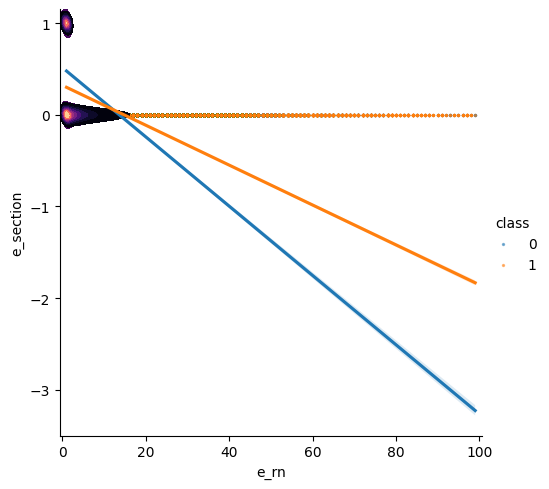

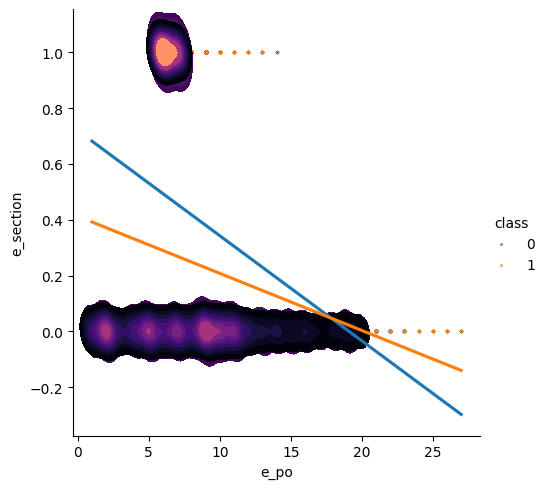

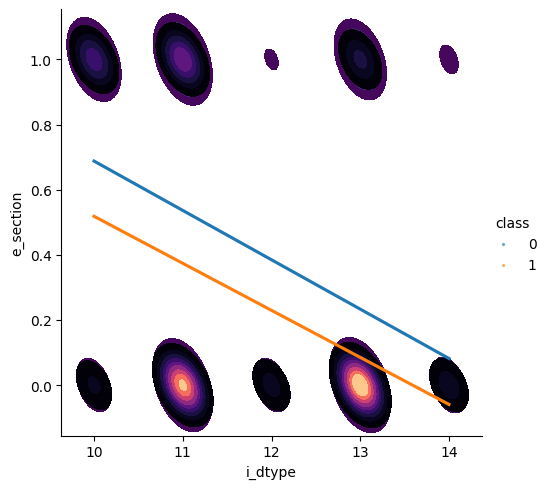

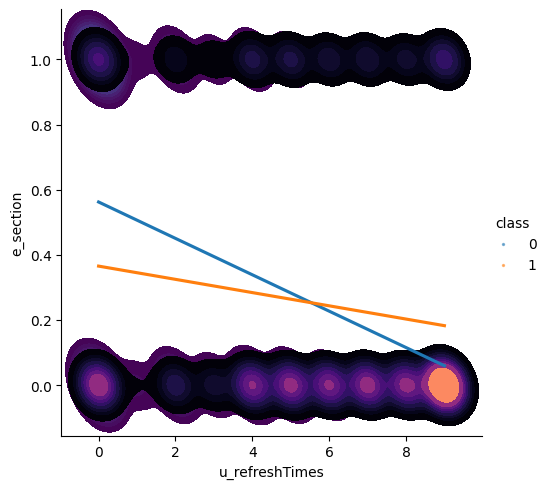

In [66]:
s = sns.lmplot(x='e_rn', y='e_section',data=ncombined_df, hue='class', fit_reg=True,scatter_kws={'s':2, 'alpha':0.5})
sns.kdeplot(x='e_rn', y='e_section', data=df1, shade=True, cmap='viridis')
sns.kdeplot(x='e_rn', y='e_section', data=df2_resampled, shade=True, cmap='magma')

s = sns.lmplot(x='e_po', y='e_section',data=ncombined_df, hue='class', fit_reg=True,scatter_kws={'s':2, 'alpha':0.5})
sns.kdeplot(x='e_po', y='e_section', data=df1, shade=True, cmap='viridis')
sns.kdeplot(x='e_po', y='e_section', data=df2_resampled, shade=True, cmap='magma')

s = sns.lmplot(x='i_dtype', y='e_section',data=ncombined_df, hue='class', fit_reg=True,scatter_kws={'s':2, 'alpha':0.5})
sns.kdeplot(x='i_dtype', y='e_section', data=df1, shade=True, cmap='viridis')
sns.kdeplot(x='i_dtype', y='e_section', data=df2_resampled, shade=True, cmap='magma')

s = sns.lmplot(x='u_refreshTimes', y='e_section',data=ncombined_df, hue='class', fit_reg=True,scatter_kws={'s':2, 'alpha':0.5})
sns.kdeplot(x='u_refreshTimes', y='e_section', data=df1, shade=True, cmap='viridis')
sns.kdeplot(x='u_refreshTimes', y='e_section', data=df2_resampled, shade=True, cmap='magma')

plt.show()